# Movie Recommendation System

**Content Based Filtering**--(IF watched one comedy movie , then it will suggest another comedy movie)

**Collaborative Filtering** --(If buyed a IPhone on Amazon it will suggest an earpods or phone cover or other things related to it)

In [1]:
import numpy as np 
import pandas as pd

In [2]:
movie=pd.read_csv('movies.csv')
rating=pd.read_csv('ratings.csv')

In [3]:
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
data = pd.merge(movie,rating,on='movieId')
data.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


### Exploratory Data Analysis

Visualization Imports

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

C:\Users\HP\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [7]:
data.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Gena the Crocodile (1969)              5.0
True Stories (1986)                    5.0
Cosmic Scrat-tastrophe (2015)          5.0
Love and Pigeons (1985)                5.0
Red Sorghum (Hong gao liang) (1987)    5.0
Name: rating, dtype: float64

In [8]:
data.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [9]:
ratings = pd.DataFrame(data.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [10]:
ratings['num of ratings'] = pd.DataFrame(data.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


Now a few histograms

<AxesSubplot:>

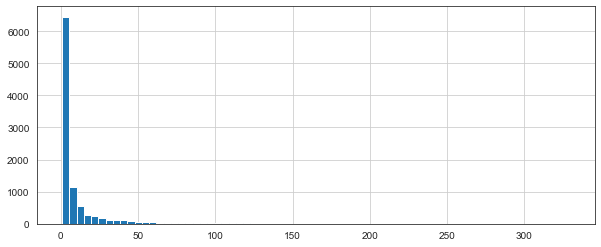

In [11]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70)

<AxesSubplot:>

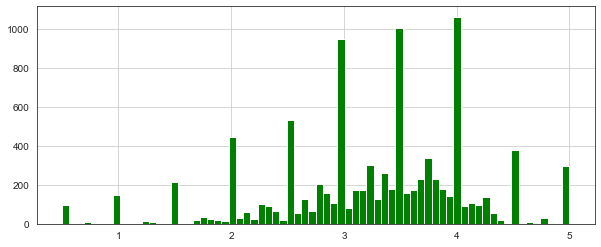

In [12]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70,color='g')

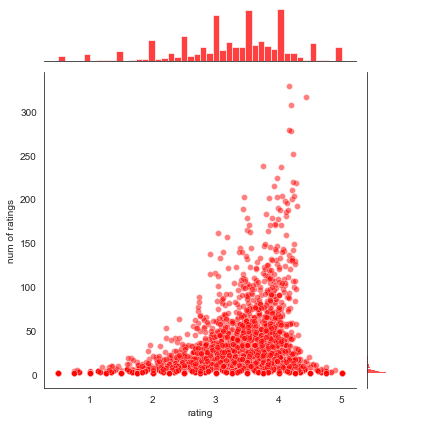

In [13]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5,color='r')

Now that we have a general idea of what the data looks like, let's move on to creating a simple recommendation system:

**Recommending Similar Movies**

Now let's create a matrix that has the user ids on one access and the movie title on another axis. Each cell will then consist of the rating the user gave to that movie. Note there will be a lot of NaN values, because most people have not seen most of the movies.

In [14]:
moviemat = data.pivot_table(index='userId',columns='title',values='rating')
moviemat.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Most rated movie:

In [15]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


In [16]:
ratings.head()

,rating,num of ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


Let's choose two movies: **Braveheart (1995)**, a historical drama movie. And **American Beauty (1999)**, a comedy.

Now let's grab the user ratings for those two movies

In [17]:
BH_user_ratings = moviemat['Braveheart (1995)']
AB_user_ratings = moviemat['American Beauty (1999)']
BH_user_ratings.head()

userId
1    4.0
2    NaN
3    NaN
4    NaN
5    4.0
Name: Braveheart (1995), dtype: float64

In [18]:
# We can then use corrwith() method to get correlations between two pandas series:

similar_to_BH = moviemat.corrwith(BH_user_ratings)
similar_to_AB = moviemat.corrwith(AB_user_ratings)

C:\Users\HP\anaconda3\lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\HP\anaconda3\lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\HP\anaconda3\lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\HP\anaconda3\lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


In [19]:
# Let's clean this by removing NaN values and using a DataFrame instead of a series:

corr_BH = pd.DataFrame(similar_to_BH,columns=['Correlation'])
corr_BH.dropna(inplace=True)
corr_BH.head()

,Correlation
title,
"'burbs, The (1989)",0.332504
(500) Days of Summer (2009),0.021388
*batteries not included (1987),-1.000000
...And Justice for All (1979),0.327327
10 Cloverfield Lane (2016),0.534522


Now if we sort the dataframe by correlation, we should get the most similar movies, however note that we get some results that don't really make sense. This is because there are a lot of movies only watched once by users who also watched star wars (it was the most popular movie).


In [20]:
corr_BH.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Sisters (2015),1.0
"Class, The (Klass) (2007)",1.0
Ulee's Gold (1997),1.0
Say It Isn't So (2001),1.0
Savannah Smiles (1982),1.0
Chasers (1994),1.0
Children of Dune (2003),1.0
Living Out Loud (1998),1.0
Underworld (1996),1.0


Let's fix this by filtering out movies that have less than 100 reviews (this value was chosen based off the histogram from earlier).

In [21]:
corr_BH = corr_BH.join(ratings['num of ratings'])
corr_BH.head()

,Correlation,num of ratings
title,,
"'burbs, The (1989)",0.332504,17
(500) Days of Summer (2009),0.021388,42
*batteries not included (1987),-1.000000,7
...And Justice for All (1979),0.327327,3
10 Cloverfield Lane (2016),0.534522,14


Now sort the values and notice how the titles make a lot more sense:


In [22]:
corr_BH[corr_BH['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Braveheart (1995),1.000000,237
Batman Begins (2005),0.610550,116
Ocean's Eleven (2001),0.575751,119
Inception (2010),0.555414,143
"Matrix, The (1999)",0.496045,278


### Now the same for the comedy 'American Beauty'

In [23]:
corr_AB = pd.DataFrame(similar_to_AB,columns=['Correlation'])
corr_AB.dropna(inplace=True)
corr_AB = corr_AB.join(ratings['num of ratings'])
corr_AB[corr_AB['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
American Beauty (1999),1.000000,204
"Crouching Tiger, Hidden Dragon (Wo hu cang long) (2000)",0.493370,110
"Clockwork Orange, A (1971)",0.476318,120
Minority Report (2002),0.402539,120
Kill Bill: Vol. 1 (2003),0.384089,131
